In [7]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Create a class to implement KNN classifier
class KNN():
    def __init__(self):
        pass
    def train(self,X,Y):
        self.trainX=X
        self.trainY=Y
    def distance(self,v1,v2):
        dist = np.sqrt(np.sum(np.square(v1 - v2)))
        return dist
    def majority_voting(self,X):
        label = np.argmax(np.bincount(X))
        return label
    def fit(self,X,k=1):
        num_test = len(X[0])
        num_train = len(self.trainX[0])
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                dist = self.distance(X[:,i],self.trainX[:,j])
                dists[i][j]=dist
        predY = np.zeros(num_test)
        for i in range(num_test):
            kMinDist = np.argsort(dists[i])[:k]
            y_Kmin = self.trainY[kMinDist]
            predY[i] = self.majority_voting(y_Kmin.tolist())
        return predY
    def choose_k(self,X,Y):
        ks = list(range(2,10))
        scores = []
        for k in ks:
            predY0 = self.fit(X,k)
            accuracy0 = np.mean(predY0==Y)
            scores.append(accuracy0)
        final_k = scores.index(max(scores))+2
        #plot k value versus accuracy 
        plt.plot(ks,scores)
        plt.ylabel("accuracy")
        plt.xlabel("k value")
        plt.show()
        return final_k
    

In [9]:
# The following variables represents for the ATNA face dataset
trainX1 = scipy.io.loadmat('ATNT face/trainX.mat')['trainX']
trainY1 = scipy.io.loadmat('ATNT face/trainY.mat')['trainY'][0]
trainX1 = np.array(trainX1)
trainY1 = np.array(trainY1)
testX1 = scipy.io.loadmat('ATNT face/testX.mat')['testX']
testY1 = scipy.io.loadmat('ATNT face/testY.mat')['testY'][0]
testX1 = np.array(testX1)
testY1 = np.array(testY1)

# The following variables represents for the Binalpha handwritten dataset
trainX2 = scipy.io.loadmat('Binalpha handwritten/trainX.mat')['trainX']
trainY2 = scipy.io.loadmat('Binalpha handwritten/trainY.mat')['trainY'][0]
trainX2 = np.array(trainX2)
trainY2 = np.array(trainY2)
testX2 = scipy.io.loadmat('Binalpha handwritten/testX.mat')['testX']
testY2 = scipy.io.loadmat('Binalpha handwritten/testY.mat')['testY'][0]
testX2 = np.array(testX2)
testY2 = np.array(testY2)

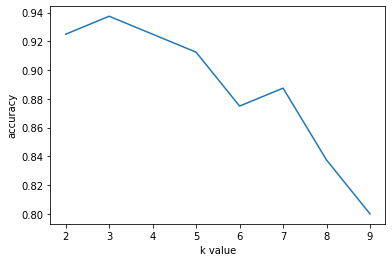

accuracy：0.937500


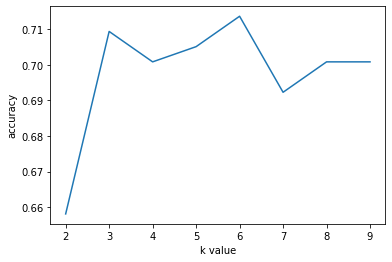

accuracy：0.713675


In [4]:
# ATNA face: the final k we choose is 3 and the accuracy of the test data is 0.937500
knn1 = KNN()
knn1.train(trainX1,trainY1)
final_k1 = knn1.choose_k(testX1,testY1)
predY1 = knn1.fit(testX1,final_k1)
accuracy1 = np.mean(predY1==testY1)
print('accuracy：%f' % accuracy1)

# Binalpha handwritten: the final k we choose is 6 and the accuracy of the test data is 0.713675
knn2 = KNN()
knn2.train(trainX2,trainY2)
final_k2 = knn2.choose_k(testX2,testY2)
predY2 = knn2.fit(testX2,final_k2)
accuracy2 = np.mean(predY2==testY2)
print('accuracy：%f' % accuracy2)


REPORT(119010259 沈嘉佑/120090414 费祥)
In our KNN class, we use Euclidean distance to estimate the distance between two feature vectors. We also create a method named choose_k, which will return the acuuracy for different k value and choose the best k from them. Since using small k will make the fitting too flexible, we set the range of k to be [2,10]. 
For the ATNA face dataset, we can find the result from the plot that when k equals to 3, the test image has the highest accuracy which is 0.937500. And for the Binalpha handwritten dataset, we can find the result that when k equals to 6, the test image has the highest accuracy which is 0.713675. The predicted test class labels for the two dataset are shown in the following codes.
Compared with the ATNA face dataset, Binalpha handwritten dataset has a much lower accuracy using KNN classifier. Perhaps it is because the variables of Binalpha handwritten dataset are all qualitative variables and the Euclidean distance can not distinguish the different classes very well. We may try more methods to find a better fitting model. 

In [5]:
# predicted test class label for ANTA face 
print(predY1)

[ 1.  1.  2.  2.  3.  3.  4.  4.  5. 18.  6.  6.  7.  7.  8.  8.  9.  9.
 38.  8. 11. 11. 12. 12. 13. 13. 14. 14. 15. 15. 16. 16. 17. 17. 18. 18.
 15. 19. 20. 20. 21. 21. 22. 22. 23. 23. 24. 24. 25. 25. 26. 26. 27. 27.
 28. 28. 29. 29. 30. 30. 31. 31. 32. 32. 33. 33. 34. 34. 35. 35. 36. 36.
 37. 37. 38. 38. 39. 39. 40.  5.]


In [6]:
# predicted test class label for Binalpha handwritten 
print(predY2)

[ 1.  1.  1.  1.  1.  1.  1.  2.  1. 19.  2.  2. 18.  2.  2.  5. 10.  2.
 15.  3.  3.  3.  3.  3.  3.  3.  3.  4.  4. 15.  4.  4.  4.  4. 20.  4.
  5. 12.  5.  5.  5.  3.  5.  3.  5.  6.  6.  3.  6.  1.  6. 16. 16. 16.
  3.  3.  7. 14. 25.  7.  2.  6.  7.  1.  8.  8. 13. 11.  8. 13.  8.  8.
  9. 12. 25.  9.  9.  9.  9. 26. 10. 10. 10. 20. 10. 10. 10. 10.  9.  9.
 12. 11. 11. 11. 11. 11. 12. 24. 11. 12. 12. 12. 12. 12. 12. 12. 12. 12.
 13. 13.  1. 13. 13.  8. 13. 13.  8. 14. 14.  8. 14. 14. 14. 14. 14. 14.
 16.  3. 15. 15. 17. 15. 15. 15.  3. 16. 16. 16. 16. 16. 16. 16. 16. 16.
 15. 17. 17. 25.  4.  1. 16. 17. 17.  1. 18. 18. 11. 24.  3. 11. 16. 18.
 19. 19. 19. 10. 19. 19. 19. 19. 19. 20. 20. 20. 20. 20. 20. 20.  6. 20.
 21. 21. 11. 21. 21. 21. 21. 12. 21. 22. 22. 22. 22. 22. 22. 22. 22. 22.
  8. 14. 23. 23. 23.  8. 23. 23. 22. 24. 24. 24. 24. 24. 24. 24. 24. 22.
 22. 25. 25. 25. 25. 25. 25. 25. 13. 26. 26. 12. 26. 26. 26. 26. 26. 26.]
